Modified and improved model performance from base code from IBM Coursera: Machine Learning with Python

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

## Data Collection

In [2]:
import requests

# store url of dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
# Create requests variable 
r = requests.get(url, allow_redirects=True)
# Write content of request to 'teleCust1000t.csv' file
open('teleCust1000t.csv', 'wb').write(r.content)

36047

In [3]:
df = pd.read_csv("teleCust1000t.csv")

# take a look at the dataset
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Exploratory Data Analysis

In [4]:
bar_df = df['custcat'].value_counts()
bar_df

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Categories:
1 - Basic Service
2 - E-Service
3 - Plus Service
4 - Total Service

<AxesSubplot:>

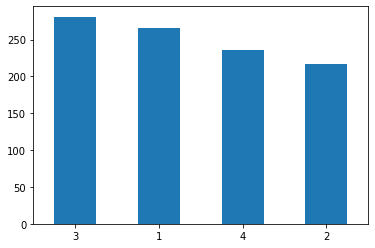

In [5]:
bar_df.plot.bar(rot=0)

#### Check columns / isna values

In [7]:
df.nunique().sort_values(ascending=False)

income     218
tenure      72
age         60
address     50
employ      46
reside       8
ed           5
custcat      4
region       3
marital      2
retire       2
gender       2
dtype: int64

In [9]:
df.nunique()\
    .rename('nunique')\
    .to_frame()\
    .join([df.isna().sum().rename('isna'),
           df.dtypes.rename('type')])\
    .sort_values('nunique')\
    .style.bar()

,nunique,isna,type
marital,2,0,int64
retire,2,0,float64
gender,2,0,int64
region,3,0,int64
custcat,4,0,int64
ed,5,0,int64
reside,8,0,int64
employ,46,0,int64
address,50,0,int64
age,60,0,int64


Note: low cardinality categories below could be one-hot encoded to see if accuracy gains made on baseline model:
['marital', 'retire', 'gender', 'region', 'ed', 'reside']

Features Distribution


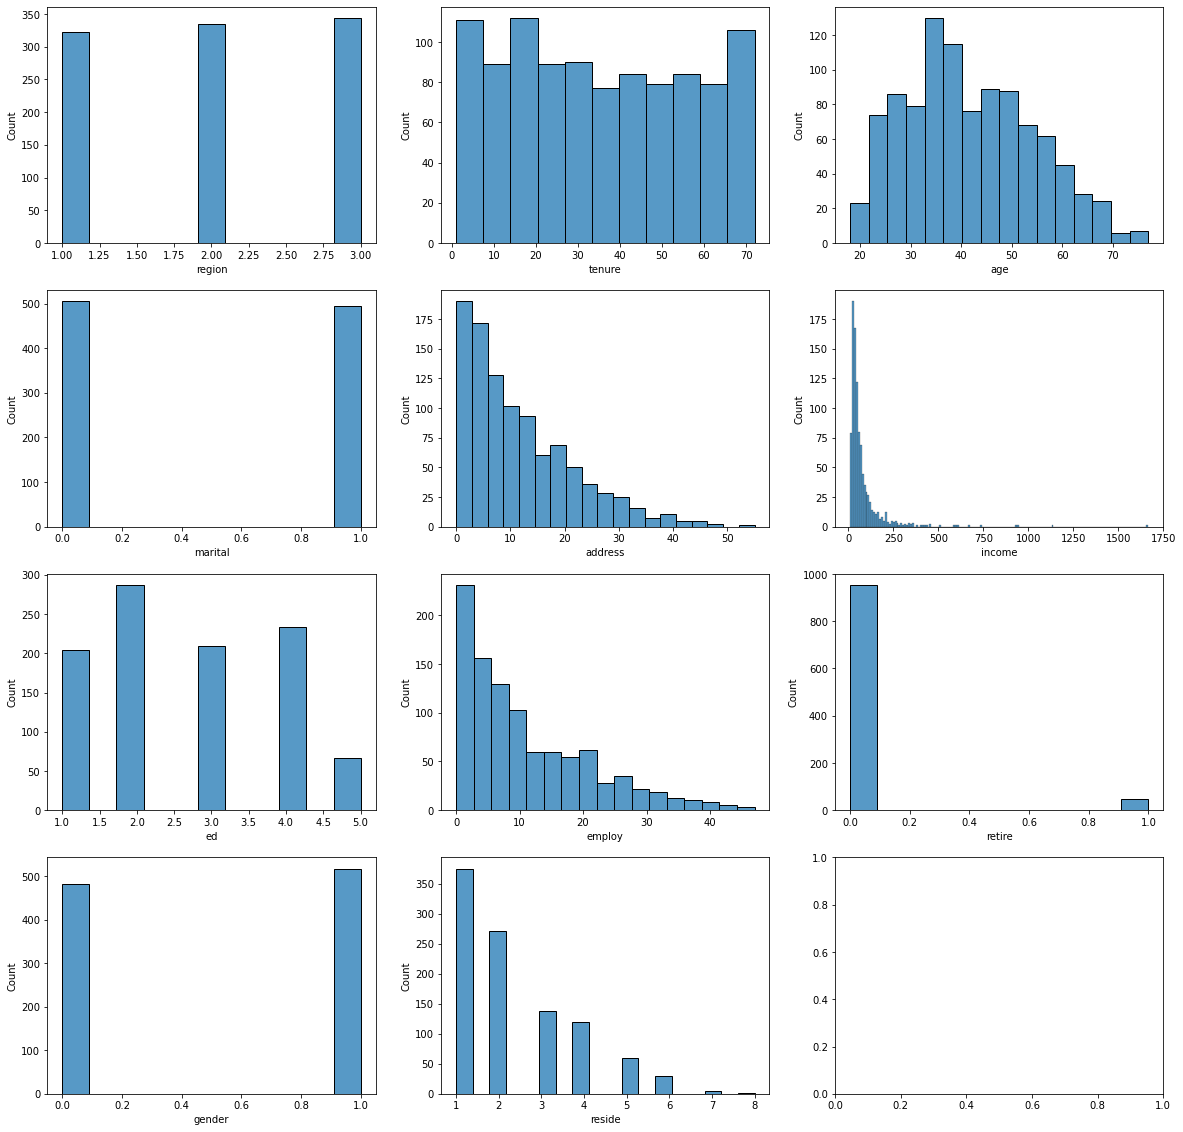

In [15]:
print("Features Distribution")
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,20))

for col, ax in zip(df.loc[:, df.columns!='custcat'], axs.flat):
    sns.histplot(data=df,
                 x=col,
                 stat='count',
                 common_norm=False,
                 ax=ax)

### Feature set and target

In [16]:
# convert to Numpy array
X = np.asanyarray(df.loc[:, df.columns!='custcat'])  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [20]:
y = np.asanyarray(df['custcat'])
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Normalize data

In [17]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Normalize data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### Create Train, Test, Evaluate Accuracy function (take k as parameter)

In [37]:
def train_test_acc(k, X_train, X_test, y_train, y_test):
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    
    # Evaluate accuracy
    #train_set_acc = metrics.accuracy_score(y_train, neigh.predict(X_train))
    test_set_acc = metrics.accuracy_score(y_test, yhat)
    std_acc = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    return (test_set_acc, std_acc)

#### Loop k-values to compare model accuracy

In [51]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for k in range(1,Ks):
    
    #Train Model and Predict  
    mean_acc[k-1], std_acc[k-1] = train_test_acc(k, X_train, X_test, y_train, y_test)

In [52]:
mean_acc.tolist()

[0.3,
 0.29,
 0.315,
 0.32,
 0.315,
 0.31,
 0.335,
 0.325,
 0.34,
 0.33,
 0.315,
 0.34,
 0.33,
 0.315,
 0.34,
 0.36,
 0.355,
 0.35,
 0.345]

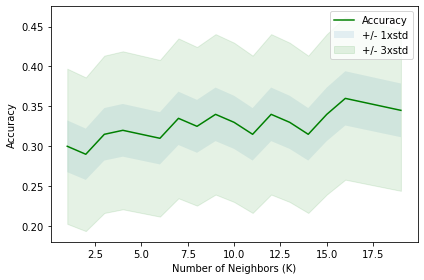

In [53]:
# plot graph
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [54]:
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was 0.36 with k= 16
